# Music Recommender

## Table of Contents

1. [Billboard Top100](#Billboard-Top100)
2. [Spotify](#Spotify)
3. [Clustering](#Clustering)
4. [Song recommendationeratorizer](#Song-recommendationeratorizer)

## Billboard Top100

In [396]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from random import randint
import os

In [397]:
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [3]:
#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max

In [398]:
soup = BeautifulSoup(response.content, "html.parser")

In [399]:
# searching...
soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max")

[<li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-1@mobile-max">
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 All Too Well (Taylor's Version)
 </h3>
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 Taylor Swift
 </span>
 </li>]

In [400]:
# searching...
soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max span")

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 Taylor Swift
 </span>]

In [401]:
# get our song titles
song_titles = []
for crouton in soup.select("li.lrv-u-width-100p h3"):
    song_titles.append(crouton.get_text())

In [402]:
# get artist and other data
span = []
for crouton in soup.select("li.lrv-u-width-100p span"):
    span.append(crouton.get_text())

In [403]:
len(span)

700

In [404]:
# filter the artist and other data
artist_x = []
last_week_pos_x = []
peak_pos_x = []
weeks_on_chart_x = []

i = 0
for i in range(len(span)):
    if i % 7 == 0:
        artist_x.append(span[i])
    elif i % 7 == 1:
        last_week_pos_x.append(span[i])
    elif i % 7 == 2:
        peak_pos_x.append(span[i])
    elif i % 7 == 3:
        weeks_on_chart_x.append(span[i])

In [405]:
# clean the /n from our fields
songs = []
artist = []
last_week_pos = []
peak_pos = []
weeks_on_chart = []

i = 0
for i in range(len(song_titles)):
    songs.append(song_titles[i].replace('\n',''))
    artist.append(artist_x[i].replace('\n',''))
    last_week_pos.append(last_week_pos_x[i].replace('\n',''))
    peak_pos.append(peak_pos_x[i].replace('\n',''))
    weeks_on_chart.append(weeks_on_chart_x[i].replace('\n',''))

In [406]:
# create dataframe
top100 = pd.DataFrame({'song_title':songs,
                      'artist':artist,
                      'last_week_pos':last_week_pos,
                      'peak_pos':peak_pos,
                      'weeks_on_chart':weeks_on_chart})

In [447]:
# show off dataframe
top100.head(20)

,song_title,artist,last_week_pos,peak_pos,weeks_on_chart
0,All Too Well (Taylor's Version),Taylor Swift,-,1,1
1,Easy On Me,Adele,1,1,6
2,Stay,The Kid LAROI & Justin Bieber,2,1,19
3,Industry Baby,Lil Nas X & Jack Harlow,3,1,17
4,Smokin Out The Window,Silk Sonic (Bruno Mars & Anderson .Paak),8,5,2
5,Bad Habits,Ed Sheeran,4,2,21
6,Shivers,Ed Sheeran,5,5,10
7,Heat Waves,Glass Animals,10,8,44
8,Need To Know,Doja Cat,9,8,23
9,Fancy Like,Walker Hayes,7,3,22


In [448]:
top100.to_csv('top_100.csv')

In [456]:
class Error(Exception):
    """Base class for other exceptions"""
    pass

class SongEmpty(Error):
    """Raised when the input value is empty"""
    pass

class ArtistEmpty(Error):
    """Raised when the input value is empty"""
    pass

def user_pick_song():
    while True:
        try: 
            song = str(input("Enter a song you like:"))
            if song == '':
                raise SongEmpty
            break
        except SongEmpty:
            print("no song entered, please enter a song")
    return song

def use_pick_artist():
    while True:
        try: 
            artist = str(input("Enter the artist:"))
            if artist == '':
                raise ArtistEmpty
            break
        except ArtistEmpty:
            print("You didn't enter an artist")
    return artist

def is_song_artist_hot(song, artist):
    for i in range(len(top100)):
        if (artist == top100['artist'][i].lower()) & (song == top100['song_title'][i].lower()):
            return True
    return False

def select_hot_song(song, artist):
    r_song = top100['song_title'][randint(0,len(top100))].lower()
    r_artist = top100['artist'][randint(0,len(top100))].lower()
    while r_song == song:
        r_song = top100['song_title'][randint(0,len(top100))].lower()
        r_artist = top100['artist'][randint(0,len(top100))].lower()
    return r_song, r_artist

In [458]:
user_song = user_pick_song()
user_artist = use_pick_artist()
user_is_hot = is_song_artist_hot(user_song,user_artist)
if user_is_hot:
    r_song, r_artist = select_hot_song(user_song, user_artist)
    display(f"Amazing AI recommends: {r_song.title()} by {r_artist.title()}")

Enter a song you like: easy on me
Enter the artist: adele


'Amazing AI recommends: Smokin Out The Window by Drake Featuring 21 Savage & Project Pat'

## Spotify

In [323]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# SpotifyClientCredentials has no arguments as SPOTIPY_CLIENT_ID and SPOTIPY_CLIENT_SECRET are set in environment variables
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())


# initial tests

# results = sp.search("Radiohead", type='artist')

# id = results['artists']['items'][0]['id']

# albums = sp.artist_albums(id)

# for album in albums['items']:
#     print(album['name'])


# albums = results['items']
# while results['next']:
#     results = spotify.next(results)
#     albums.extend(results['items'])

# for album in albums:
#     print(album['name'])

In [359]:
from random import randint
from time import sleep
import pandas as pd
from itertools import repeat

# used
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

# unused
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]

# unused
def get_name_artists_from_list(tracks):
    return flatten(list(map(get_name_artists_from_track,tracks['items'])))

# unused
def get_name_artist_from_playlist_item(item):
    return get_name_artists_from_track(item["track"])

# used
def get_name_artists_from_playlist(input_playlist):
    return flatten(list(map(get_name_artist_from_playlist_item, input_playlist["items"])))

# not used, should be though as not currently handling extra artists in larger playlists
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

# used
def get_name_artist_meta_from_item(item,playlist_name,playlist_id):
    tracks_meta = {}
    tracks_meta['playlist_name'] = playlist_name
    tracks_meta['playlist_id'] = playlist_id
    tracks_meta['song_title'] = item["name"]
    tracks_meta['artist'] = item["artists"][0]["name"]
    tracks_meta = tracks_meta | sp.audio_features(item["uri"])[0]
    return tracks_meta

# used
def get_name_artist_meta_from_itemslist(itemlist,playlist_name,playlist_id):
    return list(map(get_name_artist_meta_from_item, itemlist,repeat(playlist_name),repeat(playlist_id)))     # MIGHT NEED TO "from itertools import repeat" and use it on the extra variables I want to pass to capture playlist name and id.

# unused
def get_artists_track_meta(artist_id):
    results = sp.search(artist_id,type='artist')

def get_audio_features_from_item(item):
    return sp.audio_features(item["uri"])[0]

def get_audio_features_from_items(itemlist):
    return list(map(get_name_artist_meta_from_item, itemlist))    

In [216]:
playlists = []
playlists.append(sp.user_playlist_tracks("spotify", "37i9dQZF1DX1adpUbAHocs")) # Scenic Route

In [217]:
playlists.append(sp.user_playlist_tracks("spotify", "37i9dQZF1EQpj7X7UK8OOF")) # Rock Mix

In [218]:
playlists.append(sp.user_playlist_tracks("spotify", "37i9dQZF1DX9O8pzsnCkf6")) # Women of comedy (100+ tracks)

In [219]:
playlists.append(sp.user_playlist_tracks("spotify", "37i9dQZF1DX1Ew8a92fTdm")) # Music box lullabies

In [220]:
playlists.append(sp.user_playlist_tracks("spotify", "37i9dQZF1DX8C9xQcOrE6T")) # Disney (100+ tracks)

In [239]:
jo_is_amazing = [] # big song list, hopefully

i=0
for playlist in playlists:
    playlist_tracks_and_artists = get_name_artists_from_playlist(playlist) # extend to a wrapper for several playlists? ...errr, not handling large playlists cos it's late and we should have a good number of songs anyways
    artists_in_play_list = [artist[1] for artist in playlist_tracks_and_artists] # all the artists only
    artists_in_play_list = list(set(artists_in_play_list)) # get unique artists in playlist, ordering is lost, not a problem
    
    for artist in artists_in_play_list:
        results = sp.search(q="artist:" + artist, type="track", limit=10) # get 10 tracks for each artist
        jo_is_amazing.extend(get_name_artist_meta_from_itemslist(results["tracks"]["items"],playlist_names[i],playlist_ids[i]))
        sleep(randint(1,3))
    i=i+1

In [240]:
len(jo_is_amazing)

3174

In [245]:
erin_is_amazing = pd.DataFrame(jo_is_amazing)
erin_is_amazing.head(10)

,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Scenic Route,37i9dQZF1DX1adpUbAHocs,Texas Sun,Khruangbin,0.636,0.634,7,-10.010,1,0.0342,...,0.0998,0.599,111.563,audio_features,24ntSW3QVJzR79lHAAOTaY,spotify:track:24ntSW3QVJzR79lHAAOTaY,https://api.spotify.com/v1/tracks/24ntSW3QVJzR...,https://api.spotify.com/v1/audio-analysis/24nt...,252812,4
1,Scenic Route,37i9dQZF1DX1adpUbAHocs,Time (You and I),Khruangbin,0.751,0.490,11,-13.684,1,0.0455,...,0.0767,0.923,105.418,audio_features,0S3BtG3i5tkQmehJhIhHF3,spotify:track:0S3BtG3i5tkQmehJhIhHF3,https://api.spotify.com/v1/tracks/0S3BtG3i5tkQ...,https://api.spotify.com/v1/audio-analysis/0S3B...,342189,4
2,Scenic Route,37i9dQZF1DX1adpUbAHocs,White Gloves,Khruangbin,0.635,0.300,2,-13.957,0,0.0285,...,0.5740,0.772,91.452,audio_features,4AKUOaCRcoKTFnVI9LtsrN,spotify:track:4AKUOaCRcoKTFnVI9LtsrN,https://api.spotify.com/v1/tracks/4AKUOaCRcoKT...,https://api.spotify.com/v1/audio-analysis/4AKU...,218307,4
3,Scenic Route,37i9dQZF1DX1adpUbAHocs,People Everywhere (Still Alive),Khruangbin,0.551,0.648,7,-13.088,1,0.0627,...,0.4100,0.807,109.209,audio_features,2OQ1V0e2O56AeIo4ywuYKF,spotify:track:2OQ1V0e2O56AeIo4ywuYKF,https://api.spotify.com/v1/tracks/2OQ1V0e2O56A...,https://api.spotify.com/v1/audio-analysis/2OQ1...,159013,4
4,Scenic Route,37i9dQZF1DX1adpUbAHocs,Midnight,Khruangbin,0.667,0.556,5,-8.921,0,0.0306,...,0.0972,0.692,132.830,audio_features,7pnVHbcqbmP7LA1ey3ydvu,spotify:track:7pnVHbcqbmP7LA1ey3ydvu,https://api.spotify.com/v1/tracks/7pnVHbcqbmP7...,https://api.spotify.com/v1/audio-analysis/7pnV...,314684,4
5,Scenic Route,37i9dQZF1DX1adpUbAHocs,So We Won't Forget,Khruangbin,0.641,0.413,2,-13.212,1,0.1020,...,0.1830,0.967,101.270,audio_features,4HpFU6eMThgW6Cael5AwYy,spotify:track:4HpFU6eMThgW6Cael5AwYy,https://api.spotify.com/v1/tracks/4HpFU6eMThgW...,https://api.spotify.com/v1/audio-analysis/4HpF...,298333,4
6,Scenic Route,37i9dQZF1DX1adpUbAHocs,Evan Finds the Third Room,Khruangbin,0.781,0.383,10,-9.975,0,0.0826,...,0.1650,0.830,105.795,audio_features,2nIhVeiF7vlUmPyevRKrKV,spotify:track:2nIhVeiF7vlUmPyevRKrKV,https://api.spotify.com/v1/tracks/2nIhVeiF7vlU...,https://api.spotify.com/v1/audio-analysis/2nIh...,240743,4
7,Scenic Route,37i9dQZF1DX1adpUbAHocs,Dern Kala,Khruangbin,0.632,0.646,9,-11.398,1,0.0385,...,0.1160,0.671,87.325,audio_features,47FmTHqPWGWEfbgDpLjvCt,spotify:track:47FmTHqPWGWEfbgDpLjvCt,https://api.spotify.com/v1/tracks/47FmTHqPWGWE...,https://api.spotify.com/v1/audio-analysis/47Fm...,219840,4
8,Scenic Route,37i9dQZF1DX1adpUbAHocs,Dearest Alfred (MyJoy),Khruangbin,0.402,0.511,11,-10.524,0,0.4300,...,0.1080,0.680,82.139,audio_features,09QrWF1BFYe8Inkh9Al5ye,spotify:track:09QrWF1BFYe8Inkh9Al5ye,https://api.spotify.com/v1/tracks/09QrWF1BFYe8...,https://api.spotify.com/v1/audio-analysis/09Qr...,195604,4
9,Scenic Route,37i9dQZF1DX1adpUbAHocs,Two Fish and an Elephant,Khruangbin,0.452,0.579,2,-11.085,1,0.0476,...,0.6370,0.929,84.615,audio_features,2kGMBOPXMtb9gxzVYdplg9,spotify:track:2kGMBOPXMtb9gxzVYdplg9,https://api.spotify.com/v1/tracks/2kGMBOPXMtb9...,https://api.spotify.com/v1/audio-analysis/2kGM...,213760,4


In [243]:
erin_is_amazing.playlist_name.value_counts()

Disney                 1100
Scenic Route            990
Rock Mix                380
Music box lullabies     379
Women of comedy         325
Name: playlist_name, dtype: int64

In [249]:
erin_is_amazing.to_csv('tracks.csv', index=False)

In [175]:
#testing stuff
#tracks_metas = []

#tracks_meta = sp.audio_features(results["tracks"]["items"][0]["uri"])
#tracks_meta = pd.DataFrame(tracks_meta)
#tracks_meta.append(results["tracks"]["items"][0]["name"])
#tracks_meta.append(results["tracks"]["items"][0]["artists"][0]["name"])

In [176]:
#testing stuff
# tracks_meta = {}
# tracks_meta['song_title'] = results["tracks"]["items"][0]["name"]
# tracks_meta['artist'] = results["tracks"]["items"][0]["artists"][0]["name"]
# tracks_meta = tracks_meta | sp.audio_features(results["tracks"]["items"][0]["uri"])[0]
# tracks_metas.append(tracks_meta)
# tracks_metas

In [177]:
# testing stuff
# tracks_metas = []
# tracks_metas.append(get_name_artist_meta_from_item(results["tracks"]["items"][0]))
# tracks_metas.append(get_name_artist_meta_from_item(results["tracks"]["items"][1]))
# tracks_metas.append(get_name_artist_meta_from_item(results["tracks"]["items"][2]))
# tracks_metas

In [179]:
# testing stuff
# get_name_artist_meta_from_itemslist(results["tracks"]["items"])

In [180]:
#testing stuff
# tracks_metas = pd.DataFrame(tracks_metas)
# tracks_metas

## Clustering

In [450]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pickle

In [250]:
spotify_music_data = pd.read_csv('tracks.csv')

In [260]:
spotify_music_data_num = spotify_music_data.select_dtypes(include=np.number)

In [453]:
my_scaler = StandardScaler().fit(spotify_music_data_num)
X_prep = my_scaler.transform(spotify_music_data_num)
pickle.dump(my_scaler, open('my_scaler.p', 'wb'))
pd.DataFrame(X_prep,columns=spotify_music_data_num.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.593121,0.517688,0.541047,0.131076,0.569346,-0.454378,-1.405877,0.032699,-0.575498,0.434531,-0.109686,0.300048,0.321259
1,1.356531,-0.043947,1.673447,-0.573417,0.569346,-0.410949,-1.483534,0.042891,-0.679061,1.720148,-0.314619,1.012625,0.321259
2,0.586483,-0.784993,-0.874452,-0.625765,-1.756400,-0.476285,0.544554,2.349708,1.550460,1.120987,-0.780378,0.024949,0.321259
3,0.028862,0.572291,0.541047,-0.459133,0.569346,-0.344844,-1.386681,1.758565,0.815207,1.259865,-0.188191,-0.447784,0.321259
4,0.798910,0.213469,-0.025153,0.339893,-1.756400,-0.468214,-1.339855,-0.430024,-0.587155,0.803551,0.599558,0.793335,0.321259


In [268]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=1234)

In [269]:
kmeans.inertia_

24870.18721853611

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

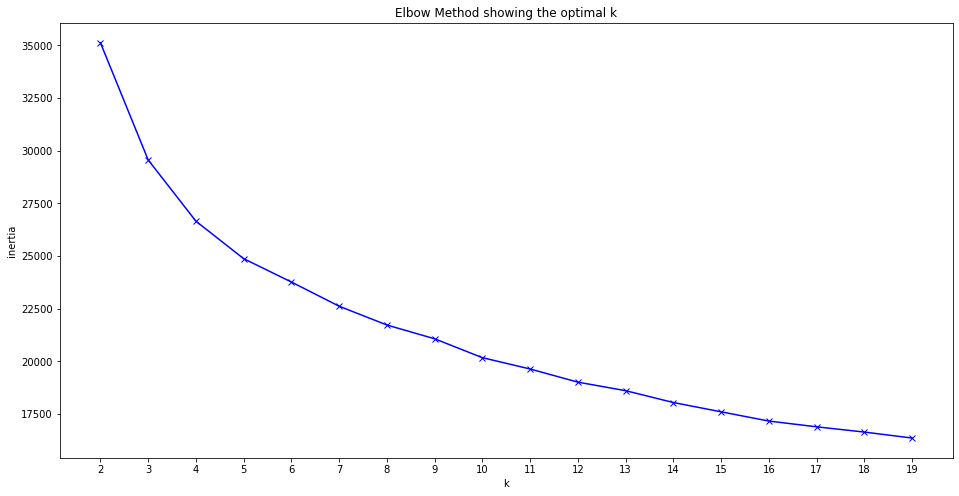

In [270]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

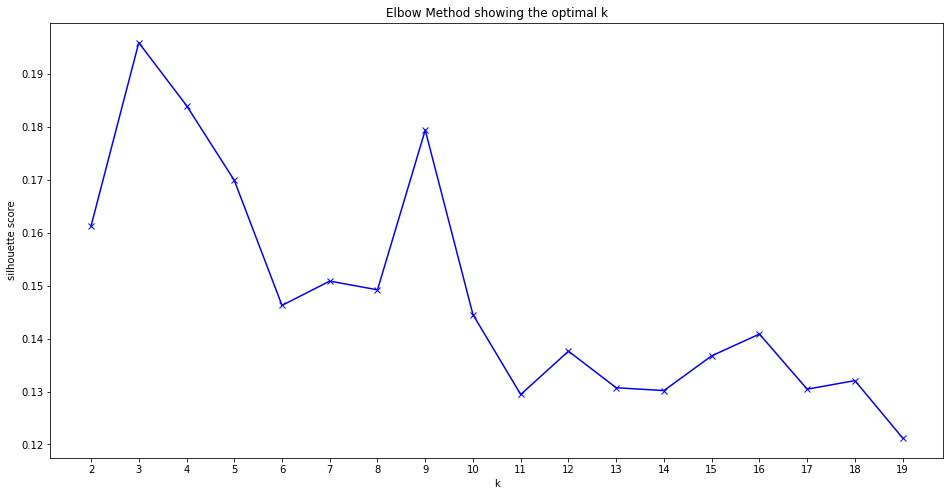

In [385]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [454]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pickle.dump(kmeans, open('my_model.p', 'wb'))

In [429]:
kmeans.inertia_

24870.18721853611

In [430]:
clusters_df = pd.DataFrame(clusters, columns=['cluster_assigned'])
spotify_music_tracks_with_cluster = pd.concat([clusters_df, spotify_music_data],axis=1)

In [431]:
spotify_music_tracks_with_cluster.groupby(by=['playlist_name','cluster_assigned']).size()

playlist_name        cluster_assigned
Disney               0                    53
                     1                   448
                     2                   369
                     3                   206
                     4                    24
Music box lullabies  0                   272
                     1                    54
                     2                    31
                     3                    20
                     4                     2
Rock Mix             0                     4
                     1                    45
                     2                   228
                     3                   103
Scenic Route         0                    17
                     1                   384
                     2                   419
                     3                   170
Women of comedy      0                     4
                     1                     8
                     2                     9
                 

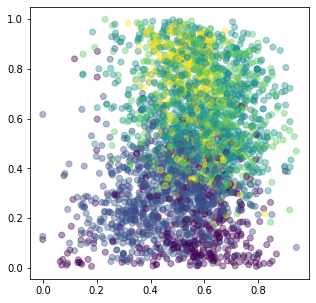

In [308]:
plt.figure(figsize=(5, 5))
plt.scatter(spotify_music_tracks_with_cluster['danceability'], spotify_music_tracks_with_cluster['energy'], c=spotify_music_tracks_with_cluster['cluster_assigned'],alpha=0.4)
plt.show()

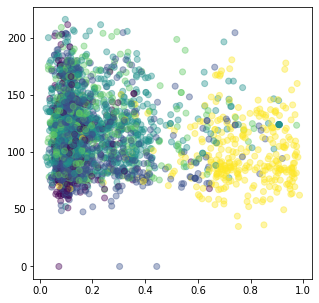

In [309]:
plt.figure(figsize=(5, 5))
plt.scatter(spotify_music_tracks_with_cluster['liveness'], spotify_music_tracks_with_cluster['tempo'], c=spotify_music_tracks_with_cluster['cluster_assigned'],alpha=0.4)
plt.show()

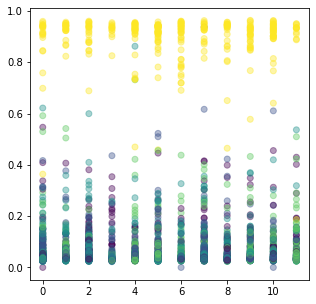

In [311]:
plt.figure(figsize=(5, 5))
plt.scatter(spotify_music_tracks_with_cluster['key'], spotify_music_tracks_with_cluster['speechiness'], c=spotify_music_tracks_with_cluster['cluster_assigned'],alpha=0.4)
plt.show()

In [300]:
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['playlist_name']=='Scenic Route'].head(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['playlist_name']=='Disney'].head(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['playlist_name']=='Women of comedy'].head(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['playlist_name']=='Music box lullabies'].head(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['playlist_name']=='Rock Mix'].head(10))

,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,Texas Sun,Khruangbin,0.636,0.634,7,-10.010,1,...,0.0998,0.599,111.563,audio_features,24ntSW3QVJzR79lHAAOTaY,spotify:track:24ntSW3QVJzR79lHAAOTaY,https://api.spotify.com/v1/tracks/24ntSW3QVJzR...,https://api.spotify.com/v1/audio-analysis/24nt...,252812,4
1,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,Time (You and I),Khruangbin,0.751,0.490,11,-13.684,1,...,0.0767,0.923,105.418,audio_features,0S3BtG3i5tkQmehJhIhHF3,spotify:track:0S3BtG3i5tkQmehJhIhHF3,https://api.spotify.com/v1/tracks/0S3BtG3i5tkQ...,https://api.spotify.com/v1/audio-analysis/0S3B...,342189,4
2,0,Scenic Route,37i9dQZF1DX1adpUbAHocs,White Gloves,Khruangbin,0.635,0.300,2,-13.957,0,...,0.5740,0.772,91.452,audio_features,4AKUOaCRcoKTFnVI9LtsrN,spotify:track:4AKUOaCRcoKTFnVI9LtsrN,https://api.spotify.com/v1/tracks/4AKUOaCRcoKT...,https://api.spotify.com/v1/audio-analysis/4AKU...,218307,4
3,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,People Everywhere (Still Alive),Khruangbin,0.551,0.648,7,-13.088,1,...,0.4100,0.807,109.209,audio_features,2OQ1V0e2O56AeIo4ywuYKF,spotify:track:2OQ1V0e2O56AeIo4ywuYKF,https://api.spotify.com/v1/tracks/2OQ1V0e2O56A...,https://api.spotify.com/v1/audio-analysis/2OQ1...,159013,4
4,3,Scenic Route,37i9dQZF1DX1adpUbAHocs,Midnight,Khruangbin,0.667,0.556,5,-8.921,0,...,0.0972,0.692,132.830,audio_features,7pnVHbcqbmP7LA1ey3ydvu,spotify:track:7pnVHbcqbmP7LA1ey3ydvu,https://api.spotify.com/v1/tracks/7pnVHbcqbmP7...,https://api.spotify.com/v1/audio-analysis/7pnV...,314684,4
5,0,Scenic Route,37i9dQZF1DX1adpUbAHocs,So We Won't Forget,Khruangbin,0.641,0.413,2,-13.212,1,...,0.1830,0.967,101.270,audio_features,4HpFU6eMThgW6Cael5AwYy,spotify:track:4HpFU6eMThgW6Cael5AwYy,https://api.spotify.com/v1/tracks/4HpFU6eMThgW...,https://api.spotify.com/v1/audio-analysis/4HpF...,298333,4
6,3,Scenic Route,37i9dQZF1DX1adpUbAHocs,Evan Finds the Third Room,Khruangbin,0.781,0.383,10,-9.975,0,...,0.1650,0.830,105.795,audio_features,2nIhVeiF7vlUmPyevRKrKV,spotify:track:2nIhVeiF7vlUmPyevRKrKV,https://api.spotify.com/v1/tracks/2nIhVeiF7vlU...,https://api.spotify.com/v1/audio-analysis/2nIh...,240743,4
7,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,Dern Kala,Khruangbin,0.632,0.646,9,-11.398,1,...,0.1160,0.671,87.325,audio_features,47FmTHqPWGWEfbgDpLjvCt,spotify:track:47FmTHqPWGWEfbgDpLjvCt,https://api.spotify.com/v1/tracks/47FmTHqPWGWE...,https://api.spotify.com/v1/audio-analysis/47Fm...,219840,4
8,0,Scenic Route,37i9dQZF1DX1adpUbAHocs,Dearest Alfred (MyJoy),Khruangbin,0.402,0.511,11,-10.524,0,...,0.1080,0.680,82.139,audio_features,09QrWF1BFYe8Inkh9Al5ye,spotify:track:09QrWF1BFYe8Inkh9Al5ye,https://api.spotify.com/v1/tracks/09QrWF1BFYe8...,https://api.spotify.com/v1/audio-analysis/09Qr...,195604,4
9,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,Two Fish and an Elephant,Khruangbin,0.452,0.579,2,-11.085,1,...,0.6370,0.929,84.615,audio_features,2kGMBOPXMtb9gxzVYdplg9,spotify:track:2kGMBOPXMtb9gxzVYdplg9,https://api.spotify.com/v1/tracks/2kGMBOPXMtb9...,https://api.spotify.com/v1/audio-analysis/2kGM...,213760,4


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2074,1,Disney,37i9dQZF1DX8C9xQcOrE6T,"Hakuna Matata - From ""The Lion King""/Soundtrack",Nathan Lane,0.408,0.313,0,-18.090,1,...,0.1150,0.725,170.013,audio_features,5k3U0OGYBccHdKJJu3HrUN,spotify:track:5k3U0OGYBccHdKJJu3HrUN,https://api.spotify.com/v1/tracks/5k3U0OGYBccH...,https://api.spotify.com/v1/audio-analysis/5k3U...,213600,4
2075,1,Disney,37i9dQZF1DX8C9xQcOrE6T,"Hakuna Matata - From ""The Lion King""/Soundtrack",Nathan Lane,0.418,0.328,0,-17.067,1,...,0.1280,0.680,164.315,audio_features,6JVMZsNrp4s6kfFMKZITbM,spotify:track:6JVMZsNrp4s6kfFMKZITbM,https://api.spotify.com/v1/tracks/6JVMZsNrp4s6...,https://api.spotify.com/v1/audio-analysis/6JVM...,213733,4
2076,2,Disney,37i9dQZF1DX8C9xQcOrE6T,Hakuna Matata,Nathan Lane,0.468,0.442,0,-11.088,1,...,0.1280,0.706,164.286,audio_features,40tNMVj7dZAKhGr4FrhUzk,spotify:track:40tNMVj7dZAKhGr4FrhUzk,https://api.spotify.com/v1/tracks/40tNMVj7dZAK...,https://api.spotify.com/v1/audio-analysis/40tN...,247760,4
2077,1,Disney,37i9dQZF1DX8C9xQcOrE6T,Morticia - 2010 Original Cast Recording from T...,Nathan Lane,0.470,0.460,7,-11.914,1,...,0.0725,0.563,106.164,audio_features,1px88jHaVAXtoJcjF0uUgP,spotify:track:1px88jHaVAXtoJcjF0uUgP,https://api.spotify.com/v1/tracks/1px88jHaVAXt...,https://api.spotify.com/v1/audio-analysis/1px8...,229640,4
2078,1,Disney,37i9dQZF1DX8C9xQcOrE6T,Happy/Sad - 2010 Original Cast Recording from ...,Nathan Lane,0.312,0.200,1,-13.074,1,...,0.1230,0.211,100.550,audio_features,2rJ5kKaTcswlGcxE38oDNR,spotify:track:2rJ5kKaTcswlGcxE38oDNR,https://api.spotify.com/v1/tracks/2rJ5kKaTcswl...,https://api.spotify.com/v1/audio-analysis/2rJ5...,235627,3
2079,1,Disney,37i9dQZF1DX8C9xQcOrE6T,Live Before We Die - 2010 Original Cast Record...,Nathan Lane,0.511,0.175,6,-15.432,0,...,0.5480,0.359,100.157,audio_features,6ZZukjn0RGKuqTBB67n085,spotify:track:6ZZukjn0RGKuqTBB67n085,https://api.spotify.com/v1/tracks/6ZZukjn0RGKu...,https://api.spotify.com/v1/audio-analysis/6ZZu...,168480,5
2080,2,Disney,37i9dQZF1DX8C9xQcOrE6T,"Hakuna Matata (From ""The Lion King 1½"") - From...",Nathan Lane,0.441,0.597,0,-7.958,1,...,0.1130,0.657,80.538,audio_features,0ox0AhILvRzvOLXEAgNSdQ,spotify:track:0ox0AhILvRzvOLXEAgNSdQ,https://api.spotify.com/v1/tracks/0ox0AhILvRzv...,https://api.spotify.com/v1/audio-analysis/0ox0...,212347,4
2081,1,Disney,37i9dQZF1DX8C9xQcOrE6T,The Oldest Established,Nathan Lane,0.582,0.283,7,-17.641,1,...,0.2500,0.720,141.246,audio_features,3uoQHZABW0BDtu7Z1fpKho,spotify:track:3uoQHZABW0BDtu7Z1fpKho,https://api.spotify.com/v1/tracks/3uoQHZABW0BD...,https://api.spotify.com/v1/audio-analysis/3uoQ...,154507,4
2082,1,Disney,37i9dQZF1DX8C9xQcOrE6T,We Can Do It,Nathan Lane,0.505,0.469,3,-12.349,1,...,0.3490,0.553,142.138,audio_features,3M8pU4JwcKduPoGSlG842A,spotify:track:3M8pU4JwcKduPoGSlG842A,https://api.spotify.com/v1/tracks/3M8pU4JwcKdu...,https://api.spotify.com/v1/audio-analysis/3M8p...,215267,3
2083,4,Disney,37i9dQZF1DX8C9xQcOrE6T,Betrayed,Nathan Lane,0.574,0.503,8,-11.099,1,...,0.1250,0.586,149.114,audio_features,1WOFcduRJxsAfLjSXjm48G,spotify:track:1WOFcduRJxsAfLjSXjm48G,https://api.spotify.com/v1/tracks/1WOFcduRJxsA...,https://api.spotify.com/v1/audio-analysis/1WOF...,292373,4


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1370,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Oprah's Favorite Things,Kathy Griffin,0.622,0.654,2,-11.078,1,...,0.963,0.418,90.222,audio_features,2eWzptOJ0zvN3pokKXvV6g,spotify:track:2eWzptOJ0zvN3pokKXvV6g,https://api.spotify.com/v1/tracks/2eWzptOJ0zvN...,https://api.spotify.com/v1/audio-analysis/2eWz...,379533,4
1371,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,My First Rebanning (Hi Barbara Walters!),Kathy Griffin,0.663,0.709,7,-10.928,1,...,0.751,0.341,82.980,audio_features,5G2CE3KVaGNn3SMadYoST2,spotify:track:5G2CE3KVaGNn3SMadYoST2,https://api.spotify.com/v1/tracks/5G2CE3KVaGNn...,https://api.spotify.com/v1/audio-analysis/5G2C...,169973,3
1372,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Cover Me,Kathy Griffin,0.674,0.656,1,-11.066,1,...,0.725,0.385,120.191,audio_features,63Lg6CgEe3KQca5WRP9T8M,spotify:track:63Lg6CgEe3KQca5WRP9T8M,https://api.spotify.com/v1/tracks/63Lg6CgEe3KQ...,https://api.spotify.com/v1/audio-analysis/63Lg...,248067,4
1373,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,The Hot Ticket,Kathy Griffin,0.533,0.813,10,-9.388,0,...,0.975,0.239,99.841,audio_features,0B2dL8hIwBgzz4YdcLRugA,spotify:track:0B2dL8hIwBgzz4YdcLRugA,https://api.spotify.com/v1/tracks/0B2dL8hIwBgz...,https://api.spotify.com/v1/audio-analysis/0B2d...,161133,4
1374,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Oprah Is A Deity (And I Think She Is Full Of S...,Kathy Griffin,0.699,0.658,10,-10.897,0,...,0.787,0.448,56.678,audio_features,2nODt0XNDy4L9I9Bhit7D4,spotify:track:2nODt0XNDy4L9I9Bhit7D4,https://api.spotify.com/v1/tracks/2nODt0XNDy4L...,https://api.spotify.com/v1/audio-analysis/2nOD...,155240,3
1375,2,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,I'll Say It,Kathy Griffin,0.604,0.788,7,-4.826,1,...,0.160,0.862,131.972,audio_features,3q4JF2Hj5Mi9OnlINvEV2P,spotify:track:3q4JF2Hj5Mi9OnlINvEV2P,https://api.spotify.com/v1/tracks/3q4JF2Hj5Mi9...,https://api.spotify.com/v1/audio-analysis/3q4J...,131972,4
1376,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Happy Sunday (More Maggie!),Kathy Griffin,0.693,0.677,11,-11.619,1,...,0.737,0.390,87.892,audio_features,62NDSlr24RSgJuRAjEmmzp,spotify:track:62NDSlr24RSgJuRAjEmmzp,https://api.spotify.com/v1/tracks/62NDSlr24RSg...,https://api.spotify.com/v1/audio-analysis/62ND...,227627,4
1377,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,The Survey: Gay? Straight?,Kathy Griffin,0.615,0.787,3,-9.499,0,...,0.902,0.157,121.882,audio_features,3gSwyQjyTPU7wFV6wkGM4G,spotify:track:3gSwyQjyTPU7wFV6wkGM4G,https://api.spotify.com/v1/tracks/3gSwyQjyTPU7...,https://api.spotify.com/v1/audio-analysis/3gSw...,43493,3
1378,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,The Osmonds Were Never Cool,Kathy Griffin,0.636,0.741,10,-11.391,0,...,0.608,0.265,126.816,audio_features,55NEoT99QgLfP37QRJa2n7,spotify:track:55NEoT99QgLfP37QRJa2n7,https://api.spotify.com/v1/tracks/55NEoT99QgLf...,https://api.spotify.com/v1/audio-analysis/55NE...,399693,3
1379,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Our New Daddy's Coming,Kathy Griffin,0.624,0.655,6,-12.401,1,...,0.699,0.403,79.813,audio_features,1sW2oKqJEBvsQWjmynIZRX,spotify:track:1sW2oKqJEBvsQWjmynIZRX,https://api.spotify.com/v1/tracks/1sW2oKqJEBvs...,https://api.spotify.com/v1/audio-analysis/1sW2...,256067,4


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1695,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Adventure Of Things,Magical Wonders,0.724,0.1440,7,-15.608,1,...,0.1360,0.8400,114.039,audio_features,1AXMCQeypMb61BTIo3SBTn,spotify:track:1AXMCQeypMb61BTIo3SBTn,https://api.spotify.com/v1/tracks/1AXMCQeypMb6...,https://api.spotify.com/v1/audio-analysis/1AXM...,104750,4
1696,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Where Stars Are Born,Magical Wonders,0.745,0.0424,8,-17.255,1,...,0.0879,0.8730,84.873,audio_features,6q8iX2vnFjMgZM55VXRKnq,spotify:track:6q8iX2vnFjMgZM55VXRKnq,https://api.spotify.com/v1/tracks/6q8iX2vnFjMg...,https://api.spotify.com/v1/audio-analysis/6q8i...,113986,3
1697,3,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Summer Talks,Magical Healing Raindrops Music,0.231,0.9990,1,-16.320,0,...,0.4260,0.0222,78.358,audio_features,1L9UuK1wfY9sJ1bWHo1xad,spotify:track:1L9UuK1wfY9sJ1bWHo1xad,https://api.spotify.com/v1/tracks/1L9UuK1wfY9s...,https://api.spotify.com/v1/audio-analysis/1L9U...,115000,4
1698,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Relaxing Spring Rain Ambient Melody,Rain Shower Magical Music,0.202,0.7670,6,-21.603,0,...,0.1260,0.0296,76.343,audio_features,0MgDB3lpeHLxqhYuQAL0fN,spotify:track:0MgDB3lpeHLxqhYuQAL0fN,https://api.spotify.com/v1/tracks/0MgDB3lpeHLx...,https://api.spotify.com/v1/audio-analysis/0MgD...,108750,1
1699,1,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Replenish Your Mind with Winter Tunes,Magical Rain Healers,0.267,0.8820,1,-19.010,1,...,0.4050,0.0338,100.425,audio_features,20ztJVZMJT8iEOyVK8E6JY,spotify:track:20ztJVZMJT8iEOyVK8E6JY,https://api.spotify.com/v1/tracks/20ztJVZMJT8i...,https://api.spotify.com/v1/audio-analysis/20zt...,119000,3
1700,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Arctic Distant Wind,Magical Rain Splash Music,0.203,0.8700,9,-21.373,0,...,0.1890,0.0198,111.655,audio_features,5VvpKoIzFVhjJbjhevHxnV,spotify:track:5VvpKoIzFVhjJbjhevHxnV,https://api.spotify.com/v1/tracks/5VvpKoIzFVhj...,https://api.spotify.com/v1/audio-analysis/5Vvp...,105000,4
1701,1,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Campfire and Thunder Melodies,Magical Rain Healers,0.250,0.8390,1,-18.676,1,...,0.4030,0.0335,99.195,audio_features,6UqV0brk0heo1614pU80gz,spotify:track:6UqV0brk0heo1614pU80gz,https://api.spotify.com/v1/tracks/6UqV0brk0heo...,https://api.spotify.com/v1/audio-analysis/6UqV...,119000,3
1702,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Pestilent Distant Wind,Magical Rain Splash Music,0.118,0.8400,2,-21.584,1,...,0.1090,0.0231,86.051,audio_features,5CubxW2xZGxlkbdqethAvY,spotify:track:5CubxW2xZGxlkbdqethAvY,https://api.spotify.com/v1/tracks/5CubxW2xZGxl...,https://api.spotify.com/v1/audio-analysis/5Cub...,125000,3
1703,3,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Rain Feels Soft,Magical Healing Raindrops Music,0.193,0.8860,9,-16.398,0,...,0.6350,0.0387,80.451,audio_features,1MtH49Z2IwuTzkkC58WAQN,spotify:track:1MtH49Z2IwuTzkkC58WAQN,https://api.spotify.com/v1/tracks/1MtH49Z2IwuT...,https://api.spotify.com/v1/audio-analysis/1MtH...,127000,4
1704,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Tomorrow Is Summer,Magical Healing Raindrops Music,0.202,0.5980,6,-16.418,1,...,0.3710,0.4410,85.365,audio_features,6MdaGwEfBQq2wIH8BxKtQq,spotify:track:6MdaGwEfBQq2wIH8BxKtQq,https://api.spotify.com/v1/tracks/6MdaGwEfBQq2...,https://api.spotify.com/v1/audio-analysis/6Mda...,115000,5


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
990,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Lonely,Palaye Royale,0.622,0.619,2,-6.400,0,...,0.0810,0.4830,147.965,audio_features,0haXiRi57j2xQo5a3WkzqV,spotify:track:0haXiRi57j2xQo5a3WkzqV,https://api.spotify.com/v1/tracks/0haXiRi57j2x...,https://api.spotify.com/v1/audio-analysis/0haX...,186250,4
991,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,No Love In LA,Palaye Royale,0.481,0.897,11,-4.181,0,...,0.3590,0.4250,103.107,audio_features,79rJtBxUfZzPuEYLoGma28,spotify:track:79rJtBxUfZzPuEYLoGma28,https://api.spotify.com/v1/tracks/79rJtBxUfZzP...,https://api.spotify.com/v1/audio-analysis/79rJ...,202657,4
992,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Mr. Doctor Man,Palaye Royale,0.376,0.939,4,-2.094,0,...,0.1090,0.5290,167.904,audio_features,1yIMrzF45Ven2FzPFAr0Gg,spotify:track:1yIMrzF45Ven2FzPFAr0Gg,https://api.spotify.com/v1/tracks/1yIMrzF45Ven...,https://api.spotify.com/v1/audio-analysis/1yIM...,244587,4
993,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Paranoid,Palaye Royale,0.426,0.821,0,-6.247,1,...,0.1210,0.2960,148.862,audio_features,6gGS0hjDNTPXlCowTPou0X,spotify:track:6gGS0hjDNTPXlCowTPou0X,https://api.spotify.com/v1/tracks/6gGS0hjDNTPX...,https://api.spotify.com/v1/audio-analysis/6gGS...,257814,4
994,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Dying In A Hot Tub,Palaye Royale,0.468,0.786,1,-6.124,1,...,0.0828,0.4000,112.288,audio_features,0kwbhAzmXoEfv1XAccsLGh,spotify:track:0kwbhAzmXoEfv1XAccsLGh,https://api.spotify.com/v1/tracks/0kwbhAzmXoEf...,https://api.spotify.com/v1/audio-analysis/0kwb...,228627,4
995,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Tonight Is The Night I Die,Palaye Royale,0.361,0.729,4,-6.014,0,...,0.3460,0.3710,143.928,audio_features,6TMEL7vpevM8hwGi8okKqp,spotify:track:6TMEL7vpevM8hwGi8okKqp,https://api.spotify.com/v1/tracks/6TMEL7vpevM8...,https://api.spotify.com/v1/audio-analysis/6TME...,172171,4
996,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Little Bastards,Palaye Royale,0.489,0.740,7,-6.317,1,...,0.1310,0.3390,98.881,audio_features,7w5rh9x3sjgTRirjfCKsjd,spotify:track:7w5rh9x3sjgTRirjfCKsjd,https://api.spotify.com/v1/tracks/7w5rh9x3sjgT...,https://api.spotify.com/v1/audio-analysis/7w5r...,218327,4
997,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Punching Bag,Palaye Royale,0.400,0.908,5,-5.317,0,...,0.0924,0.3170,165.006,audio_features,07NGioPT9vGA5Cw8EsCxSR,spotify:track:07NGioPT9vGA5Cw8EsCxSR,https://api.spotify.com/v1/tracks/07NGioPT9vGA...,https://api.spotify.com/v1/audio-analysis/07NG...,235484,4
998,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Anxiety,Palaye Royale,0.504,0.943,1,-5.532,1,...,0.5940,0.0983,91.036,audio_features,69pOaF9WArEoUCt90NiDdT,spotify:track:69pOaF9WArEoUCt90NiDdT,https://api.spotify.com/v1/tracks/69pOaF9WArEo...,https://api.spotify.com/v1/audio-analysis/69pO...,194463,4
999,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,You'll Be Fine,Palaye Royale,0.270,0.931,1,-5.016,1,...,0.2180,0.4460,124.608,audio_features,3KmuRpdh3UDv9GHyO8SmgB,spotify:track:3KmuRpdh3UDv9GHyO8SmgB,https://api.spotify.com/v1/tracks/3KmuRpdh3UDv...,https://api.spotify.com/v1/audio-analysis/3Kmu...,213395,4


In [432]:
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==0].sample(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==1].sample(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==2].sample(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==3].sample(10))
display(spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==4].sample(10))

,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1740,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Field of gold,Marshfold,0.704,0.1280,2,-17.943,1,...,0.0576,0.717,158.161,audio_features,6XH0pfJwwMWPeLHJGbnP6t,spotify:track:6XH0pfJwwMWPeLHJGbnP6t,https://api.spotify.com/v1/tracks/6XH0pfJwwMWP...,https://api.spotify.com/v1/audio-analysis/6XH0...,104400,5
1959,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,My Puppy,Irving Simon,0.668,0.1590,3,-17.447,1,...,0.0793,0.798,57.196,audio_features,5K8od7t4zYwWUr6PS16ChI,spotify:track:5K8od7t4zYwWUr6PS16ChI,https://api.spotify.com/v1/tracks/5K8od7t4zYwW...,https://api.spotify.com/v1/audio-analysis/5K8o...,155416,4
2007,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,When I Grow Up,Emilia Humphreys,0.656,0.1230,2,-25.215,1,...,0.0998,0.962,66.322,audio_features,1yHO01kk4jbiTeaEcIRfiY,spotify:track:1yHO01kk4jbiTeaEcIRfiY,https://api.spotify.com/v1/tracks/1yHO01kk4jbi...,https://api.spotify.com/v1/audio-analysis/1yHO...,90000,3
1833,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Fall Asleep My Little Angel,Louis Pope,0.707,0.1610,4,-16.444,1,...,0.0853,0.964,159.914,audio_features,4UU4RTh1YEjZIAWbnnzf8Q,spotify:track:4UU4RTh1YEjZIAWbnnzf8Q,https://api.spotify.com/v1/tracks/4UU4RTh1YEjZ...,https://api.spotify.com/v1/audio-analysis/4UU4...,92204,3
1994,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Anfaz,3MA,0.614,0.4470,5,-11.927,1,...,0.0950,0.761,112.299,audio_features,1LDgec3kWVpg0TOQGIP7DV,spotify:track:1LDgec3kWVpg0TOQGIP7DV,https://api.spotify.com/v1/tracks/1LDgec3kWVpg...,https://api.spotify.com/v1/audio-analysis/1LDg...,339987,4
2011,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,The Spider And The Funny Fly,LouLou Patterson,0.588,0.0531,0,-25.316,1,...,0.0955,0.962,142.740,audio_features,3Y3MfthU9xFXlO19WHAuSh,spotify:track:3Y3MfthU9xFXlO19WHAuSh,https://api.spotify.com/v1/tracks/3Y3MfthU9xFX...,https://api.spotify.com/v1/audio-analysis/3Y3M...,110500,4
1968,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,London Bridge (Piano Version),John B. Lund,0.726,0.1510,8,-21.956,1,...,0.1300,0.893,109.803,audio_features,53OUBSsdeNaLWBlJgsCmCf,spotify:track:53OUBSsdeNaLWBlJgsCmCf,https://api.spotify.com/v1/tracks/53OUBSsdeNaL...,https://api.spotify.com/v1/audio-analysis/53OU...,94000,4
1752,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,My Sweet Sweet Angel,Jesse Nielsen,0.633,0.0623,5,-16.790,1,...,0.0935,0.901,84.659,audio_features,0pkmiHR34jvHpoTu9MjWQy,spotify:track:0pkmiHR34jvHpoTu9MjWQy,https://api.spotify.com/v1/tracks/0pkmiHR34jvH...,https://api.spotify.com/v1/audio-analysis/0pkm...,87147,3
1839,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Angels On Your Pillow,Louis Pope,0.772,0.0805,4,-19.220,1,...,0.0773,0.140,131.975,audio_features,0uHWMM9CgDidvogoPxQkSS,spotify:track:0uHWMM9CgDidvogoPxQkSS,https://api.spotify.com/v1/tracks/0uHWMM9CgDid...,https://api.spotify.com/v1/audio-analysis/0uHW...,112628,4
1934,0,Music box lullabies,37i9dQZF1DX1Ew8a92fTdm,Some Day My Prince Will Come,David Aydin,0.671,0.1950,8,-14.759,1,...,0.0773,0.959,85.369,audio_features,6HE27hGSDqy7hisFvOVe7P,spotify:track:6HE27hGSDqy7hisFvOVe7P,https://api.spotify.com/v1/tracks/6HE27hGSDqy7...,https://api.spotify.com/v1/audio-analysis/6HE2...,76101,3


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2122,1,Disney,37i9dQZF1DX8C9xQcOrE6T,Mother Knows Best,Donna Murphy,0.509,0.265,0,-11.332,1,...,0.0514,0.5300,123.765,audio_features,6rjYXL7iOt0REQFKqI9IOg,spotify:track:6rjYXL7iOt0REQFKqI9IOg,https://api.spotify.com/v1/tracks/6rjYXL7iOt0R...,https://api.spotify.com/v1/audio-analysis/6rjY...,190440,3
2664,1,Disney,37i9dQZF1DX8C9xQcOrE6T,Silent Night,Kamehameha Schools Childrenʻs Chorus,0.475,0.137,7,-15.040,1,...,0.1600,0.2880,125.942,audio_features,0zFMmtsdwvjKcLyutxMypp,spotify:track:0zFMmtsdwvjKcLyutxMypp,https://api.spotify.com/v1/tracks/0zFMmtsdwvjK...,https://api.spotify.com/v1/audio-analysis/0zFM...,289912,4
820,1,Scenic Route,37i9dQZF1DX1adpUbAHocs,anything,Adrianne Lenker,0.412,0.289,3,-12.953,1,...,0.0883,0.5330,83.653,audio_features,4PwWESSlTwzvw9B7bmtTLS,spotify:track:4PwWESSlTwzvw9B7bmtTLS,https://api.spotify.com/v1/tracks/4PwWESSlTwzv...,https://api.spotify.com/v1/audio-analysis/4PwW...,202047,4
1518,1,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,The Reprimand - The Prince Of Egypt/Soundtrack...,Various Artists,0.192,0.128,4,-22.898,0,...,0.0771,0.0488,96.510,audio_features,7l8tMZQfvtSQ6wcS1LdgHM,spotify:track:7l8tMZQfvtSQ6wcS1LdgHM,https://api.spotify.com/v1/tracks/7l8tMZQfvtSQ...,https://api.spotify.com/v1/audio-analysis/7l8t...,245333,3
2250,1,Disney,37i9dQZF1DX8C9xQcOrE6T,Vows,Naomi Scott,0.624,0.372,7,-11.330,1,...,0.1060,0.1900,78.473,audio_features,2bBSlyNjUBK6aWvv9gB46Z,spotify:track:2bBSlyNjUBK6aWvv9gB46Z,https://api.spotify.com/v1/tracks/2bBSlyNjUBK6...,https://api.spotify.com/v1/audio-analysis/2bBS...,265021,4
75,1,Scenic Route,37i9dQZF1DX1adpUbAHocs,Does Anybody Know,Jade Bird,0.778,0.145,10,-11.950,0,...,0.1260,0.2400,109.071,audio_features,6E7MY8plyVrd0RWUDl63Kn,spotify:track:6E7MY8plyVrd0RWUDl63Kn,https://api.spotify.com/v1/tracks/6E7MY8plyVrd...,https://api.spotify.com/v1/audio-analysis/6E7M...,207936,4
958,1,Scenic Route,37i9dQZF1DX1adpUbAHocs,It Will Come Back,Gabe Goodman,0.660,0.213,4,-14.236,1,...,0.3400,0.5220,77.950,audio_features,0hHHGNuwJugMiG1wTENNnI,spotify:track:0hHHGNuwJugMiG1wTENNnI,https://api.spotify.com/v1/tracks/0hHHGNuwJugM...,https://api.spotify.com/v1/audio-analysis/0hHH...,178387,4
1248,1,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Empty Chairs,Don McLean,0.507,0.101,7,-19.953,1,...,0.2880,0.4550,93.487,audio_features,60Rvgly3lLXctiaiMOOZlx,spotify:track:60Rvgly3lLXctiaiMOOZlx,https://api.spotify.com/v1/tracks/60Rvgly3lLXc...,https://api.spotify.com/v1/audio-analysis/60Rv...,207773,3
656,1,Scenic Route,37i9dQZF1DX1adpUbAHocs,Pastels,The Brook & The Bluff,0.458,0.512,2,-11.080,1,...,0.0922,0.3650,100.009,audio_features,4v50THJgMM8eBDEw7HQ3Ij,spotify:track:4v50THJgMM8eBDEw7HQ3Ij,https://api.spotify.com/v1/tracks/4v50THJgMM8e...,https://api.spotify.com/v1/audio-analysis/4v50...,256393,4
768,1,Scenic Route,37i9dQZF1DX1adpUbAHocs,Just to Feel Alive,Nadia Reid,0.440,0.188,8,-10.978,0,...,0.3850,0.1380,107.948,audio_features,6Dd79pYVTTBoScgaLLmFa3,spotify:track:6Dd79pYVTTBoScgaLLmFa3,https://api.spotify.com/v1/tracks/6Dd79pYVTTBo...,https://api.spotify.com/v1/audio-analysis/6Dd7...,233500,3


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1239,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Holiday,Green Day,0.552,0.890,8,-3.409,1,...,0.8880,0.716,146.525,audio_features,4VgEM12OeaN3GyBV487Me7,spotify:track:4VgEM12OeaN3GyBV487Me7,https://api.spotify.com/v1/tracks/4VgEM12OeaN3...,https://api.spotify.com/v1/audio-analysis/4VgE...,232680,4
430,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,Sugar in the Creek,Bendigo Fletcher,0.317,0.696,11,-7.844,1,...,0.1080,0.680,144.950,audio_features,7ceIJcA4Scip0WlJwwUnTS,spotify:track:7ceIJcA4Scip0WlJwwUnTS,https://api.spotify.com/v1/tracks/7ceIJcA4Scip...,https://api.spotify.com/v1/audio-analysis/7ceI...,251747,4
1278,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Africa,TOTO,0.682,0.584,9,-9.507,1,...,0.0468,0.709,92.793,audio_features,6QZo2TgclkUMwJgggi8QSQ,spotify:track:6QZo2TgclkUMwJgggi8QSQ,https://api.spotify.com/v1/tracks/6QZo2TgclkUM...,https://api.spotify.com/v1/audio-analysis/6QZo...,295347,4
2204,2,Disney,37i9dQZF1DX8C9xQcOrE6T,I'm Leaving It All Up To You,Donny & Marie Osmond,0.513,0.717,11,-4.088,1,...,0.5000,0.812,108.834,audio_features,2Ar5ZYieSYLx8xfNCCgzFc,spotify:track:2Ar5ZYieSYLx8xfNCCgzFc,https://api.spotify.com/v1/tracks/2Ar5ZYieSYLx...,https://api.spotify.com/v1/audio-analysis/2Ar5...,168880,3
2163,2,Disney,37i9dQZF1DX8C9xQcOrE6T,Metal,Katie King,0.290,0.909,2,-4.765,1,...,0.3400,0.481,90.186,audio_features,6mhG5bXWztcxuiJeS69533,spotify:track:6mhG5bXWztcxuiJeS69533,https://api.spotify.com/v1/tracks/6mhG5bXWztcx...,https://api.spotify.com/v1/audio-analysis/6mhG...,466960,4
2194,2,Disney,37i9dQZF1DX8C9xQcOrE6T,Right There,Nicole Scherzinger,0.495,0.796,7,-4.251,1,...,0.2720,0.616,94.998,audio_features,6wQIYp3JceGovaINQmAjxj,spotify:track:6wQIYp3JceGovaINQmAjxj,https://api.spotify.com/v1/tracks/6wQIYp3JceGo...,https://api.spotify.com/v1/audio-analysis/6wQI...,242693,4
642,2,Scenic Route,37i9dQZF1DX1adpUbAHocs,Phoenix (feat. Fleet Foxes & Anaïs Mitchell),Big Red Machine,0.482,0.671,5,-7.135,1,...,0.0791,0.547,137.836,audio_features,5fwabfmJtYmNbcNd2ISl3x,spotify:track:5fwabfmJtYmNbcNd2ISl3x,https://api.spotify.com/v1/tracks/5fwabfmJtYmN...,https://api.spotify.com/v1/audio-analysis/5fwa...,255533,4
996,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Little Bastards,Palaye Royale,0.489,0.740,7,-6.317,1,...,0.1310,0.339,98.881,audio_features,7w5rh9x3sjgTRirjfCKsjd,spotify:track:7w5rh9x3sjgTRirjfCKsjd,https://api.spotify.com/v1/tracks/7w5rh9x3sjgT...,https://api.spotify.com/v1/audio-analysis/7w5r...,218327,4
2228,2,Disney,37i9dQZF1DX8C9xQcOrE6T,You and Me On The Rock (feat. Lucius),Brandi Carlile,0.568,0.686,1,-6.635,1,...,0.0881,0.725,172.075,audio_features,61X73CJcpwGIxgQgKEXbw0,spotify:track:61X73CJcpwGIxgQgKEXbw0,https://api.spotify.com/v1/tracks/61X73CJcpwGI...,https://api.spotify.com/v1/audio-analysis/61X7...,230098,4
2931,2,Disney,37i9dQZF1DX8C9xQcOrE6T,I NEED YOU,Jon Batiste,0.817,0.639,6,-6.383,1,...,0.1380,0.887,112.951,audio_features,0RDUnNaGubiseI1W9T3YTf,spotify:track:0RDUnNaGubiseI1W9T3YTf,https://api.spotify.com/v1/tracks/0RDUnNaGubis...,https://api.spotify.com/v1/audio-analysis/0RDU...,157133,4


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1089,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Time of Dying,Three Days Grace,0.306,0.873,0,-3.668,0,...,0.5200,0.452,198.387,audio_features,7piw04hPQZ1OHZ9Fq9JOXR,spotify:track:7piw04hPQZ1OHZ9Fq9JOXR,https://api.spotify.com/v1/tracks/7piw04hPQZ1O...,https://api.spotify.com/v1/audio-analysis/7piw...,186373,4
450,3,Scenic Route,37i9dQZF1DX1adpUbAHocs,All The Time,Bahamas,0.711,0.464,4,-4.816,0,...,0.0846,0.507,127.274,audio_features,0qI1W6chJgvrSAzAkX9JBa,spotify:track:0qI1W6chJgvrSAzAkX9JBa,https://api.spotify.com/v1/tracks/0qI1W6chJgvr...,https://api.spotify.com/v1/audio-analysis/0qI1...,234973,4
2422,3,Disney,37i9dQZF1DX8C9xQcOrE6T,House of Memories,Panic! At The Disco,0.506,0.817,11,-5.051,0,...,0.0486,0.506,109.952,audio_features,2DgdHcjWmO3qd50RzuBLgZ,spotify:track:2DgdHcjWmO3qd50RzuBLgZ,https://api.spotify.com/v1/tracks/2DgdHcjWmO3q...,https://api.spotify.com/v1/audio-analysis/2Dgd...,208707,4
997,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Punching Bag,Palaye Royale,0.400,0.908,5,-5.317,0,...,0.0924,0.317,165.006,audio_features,07NGioPT9vGA5Cw8EsCxSR,spotify:track:07NGioPT9vGA5Cw8EsCxSR,https://api.spotify.com/v1/tracks/07NGioPT9vGA...,https://api.spotify.com/v1/audio-analysis/07NG...,235484,4
1121,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Come Together - Remastered 2009,The Beatles,0.533,0.376,9,-11.913,0,...,0.0926,0.187,165.007,audio_features,2EqlS6tkEnglzr7tkKAAYD,spotify:track:2EqlS6tkEnglzr7tkKAAYD,https://api.spotify.com/v1/tracks/2EqlS6tkEngl...,https://api.spotify.com/v1/audio-analysis/2Eql...,259947,4
2937,3,Disney,37i9dQZF1DX8C9xQcOrE6T,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,0.728,0.783,11,-4.424,0,...,0.4340,0.555,77.011,audio_features,1r9xUipOqoNwggBpENDsvJ,spotify:track:1r9xUipOqoNwggBpENDsvJ,https://api.spotify.com/v1/tracks/1r9xUipOqoNw...,https://api.spotify.com/v1/audio-analysis/1r9x...,173381,4
3148,3,Disney,37i9dQZF1DX8C9xQcOrE6T,Once,Brad Caleb Kane,0.450,0.616,11,-4.625,0,...,0.2130,0.224,139.897,audio_features,3QvzzjqGOKfwkN9KbPfO8Q,spotify:track:3QvzzjqGOKfwkN9KbPfO8Q,https://api.spotify.com/v1/tracks/3QvzzjqGOKfw...,https://api.spotify.com/v1/audio-analysis/3Qvz...,275747,4
1031,3,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,...,0.0916,0.539,120.125,audio_features,4P5KoWXOxwuobLmHXLMobV,spotify:track:4P5KoWXOxwuobLmHXLMobV,https://api.spotify.com/v1/tracks/4P5KoWXOxwuo...,https://api.spotify.com/v1/audio-analysis/4P5K...,218920,4
3079,3,Disney,37i9dQZF1DX8C9xQcOrE6T,Ladder Of Lovers,Matthew Wilder,0.594,0.348,8,-13.745,0,...,0.1210,0.493,107.681,audio_features,1srDnruKr2KeiTVDYywpYn,spotify:track:1srDnruKr2KeiTVDYywpYn,https://api.spotify.com/v1/tracks/1srDnruKr2Ke...,https://api.spotify.com/v1/audio-analysis/1srD...,246840,4
4,3,Scenic Route,37i9dQZF1DX1adpUbAHocs,Midnight,Khruangbin,0.667,0.556,5,-8.921,0,...,0.0972,0.692,132.830,audio_features,7pnVHbcqbmP7LA1ey3ydvu,spotify:track:7pnVHbcqbmP7LA1ey3ydvu,https://api.spotify.com/v1/tracks/7pnVHbcqbmP7...,https://api.spotify.com/v1/audio-analysis/7pnV...,314684,4


,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1454,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Social Stuff,Jo Firestone,0.608,0.453,9,-10.656,1,...,0.679,0.6260,67.011,audio_features,0pQQj6Ncn6QYO79gPv1EZ9,spotify:track:0pQQj6Ncn6QYO79gPv1EZ9,https://api.spotify.com/v1/tracks/0pQQj6Ncn6QY...,https://api.spotify.com/v1/audio-analysis/0pQQ...,260298,4
1532,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Menopause (Jfl 2009),Whoopi Goldberg,0.671,0.703,9,-15.672,1,...,0.930,0.2200,103.676,audio_features,7eA7hJBUX7fLZ93MYQQp89,spotify:track:7eA7hJBUX7fLZ93MYQQp89,https://api.spotify.com/v1/tracks/7eA7hJBUX7fL...,https://api.spotify.com/v1/audio-analysis/7eA7...,233060,3
1424,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Baseball Cards,Andi Smith,0.642,0.434,3,-18.183,1,...,0.975,0.4680,104.982,audio_features,2fV1HEpG1cE5QYlwvAo6kZ,spotify:track:2fV1HEpG1cE5QYlwvAo6kZ,https://api.spotify.com/v1/tracks/2fV1HEpG1cE5...,https://api.spotify.com/v1/audio-analysis/2fV1...,116000,4
1537,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Menopause,Whoopi Goldberg,0.566,0.678,9,-13.053,0,...,0.723,0.3400,86.651,audio_features,5dknVB1n97uwoRvonwjhG8,spotify:track:5dknVB1n97uwoRvonwjhG8,https://api.spotify.com/v1/tracks/5dknVB1n97uw...,https://api.spotify.com/v1/audio-analysis/5dkn...,843013,4
1456,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Ya Dumped (feat. Will Butler),Jo Firestone,0.643,0.371,2,-11.680,1,...,0.652,0.4040,72.839,audio_features,6unNaK7OhhaaUUxXeMjYne,spotify:track:6unNaK7OhhaaUUxXeMjYne,https://api.spotify.com/v1/tracks/6unNaK7Ohhaa...,https://api.spotify.com/v1/audio-analysis/6unN...,173739,4
1629,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,H.S. Crush,Amy Schumer,0.421,0.931,8,-7.024,0,...,0.957,0.3500,82.296,audio_features,4bePXWlGoXiw3Gx2MzoMsP,spotify:track:4bePXWlGoXiw3Gx2MzoMsP,https://api.spotify.com/v1/tracks/4bePXWlGoXiw...,https://api.spotify.com/v1/audio-analysis/4beP...,234787,3
1497,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Women's Magazines,Margaret Cho,0.505,0.719,7,-13.746,1,...,0.977,0.0717,159.886,audio_features,6od7ByvTywjRTpwHDAO55j,spotify:track:6od7ByvTywjRTpwHDAO55j,https://api.spotify.com/v1/tracks/6od7ByvTywjR...,https://api.spotify.com/v1/audio-analysis/6od7...,106067,4
2530,4,Disney,37i9dQZF1DX8C9xQcOrE6T,"Riddle, Diddle, One, Two, Three - Demo",Verna Felton,0.732,0.292,0,-15.300,1,...,0.171,0.6130,117.854,audio_features,3fb9QBRxWsnzM8Vd1iBfWP,spotify:track:3fb9QBRxWsnzM8Vd1iBfWP,https://api.spotify.com/v1/tracks/3fb9QBRxWsnz...,https://api.spotify.com/v1/audio-analysis/3fb9...,134560,4
1571,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,Sexual Attorney,Rachel Feinstein,0.643,0.786,5,-6.331,0,...,0.776,0.3630,119.735,audio_features,3Ws9vyfQbjacczrmziCXMh,spotify:track:3Ws9vyfQbjacczrmziCXMh,https://api.spotify.com/v1/tracks/3Ws9vyfQbjac...,https://api.spotify.com/v1/audio-analysis/3Ws9...,309153,5
1479,4,Women of comedy,37i9dQZF1DX9O8pzsnCkf6,The Double Crosser,Pigmeat Markham,0.648,0.485,10,-11.972,1,...,0.717,0.4610,101.748,audio_features,42nj2F9nHnsocEfoIU4J7Q,spotify:track:42nj2F9nHnsocEfoIU4J7Q,https://api.spotify.com/v1/tracks/42nj2F9nHnso...,https://api.spotify.com/v1/audio-analysis/42nj...,356133,5


In [460]:
spotify_music_tracks_with_cluster.to_csv('tracks_clustered.csv')

## Song recommendationeratorizer

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

- Check whether or not the song is in the Billboard Hot 200.
- Collect the audio features from the Spotify API.
- After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [446]:
# checks if song is in Billboard 100 or not
user_song = user_pick_song()
user_artist = use_pick_artist()
user_is_hot = is_song_artist_hot(user_song,user_artist)
if user_is_hot:
    r_song, r_artist = select_hot_song(user_song, user_artist)
    display(f"Amazing AI recommends: {r_song.title()} by {r_artist.title()}")
else:
    print("We didn't find your song in the top 100, perhaps you would like to listen to...")

results = sp.search(q=user_song + ' ' + user_artist, type="track", market="US", limit=1)
user_song_meta = get_name_artist_meta_from_item(results["tracks"]["items"][0], "User Search", 99)
#user_song_meta = pd.DataFrame(user_song_meta)
user_song_meta
x = []
x.append(user_song_meta)
user_song_meta = pd.DataFrame(x)
user_song_meta_num = user_song_meta.select_dtypes(np.number)
user_song_meta_num = user_song_meta_num.drop(["playlist_id"],axis=1)
user_song_meta_num = my_scaler.transform(user_song_meta_num)
track_from_same_cluster = spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==kmeans.predict(user_song_meta_num)[0]].sample(1)
track_from_same_cluster[['playlist_name','playlist_id','song_title','artist']]

print("similar song: " + track_from_same_cluster[['song_title']].iloc[0,0] + " by " + track_from_same_cluster[['artist']].iloc[0,0])

# it seems to always suggest category 4 for things I wouldn't expect in there....

Enter a song you like: Supermassive Black Hole
Enter the artist: Muse


We didn't find your song in the top 100, perhaps you would like to listen to...
similar song: Scar Tissue by Red Hot Chili Peppers


In [419]:
# testing stuff

# results = sp.search(q=user_song + ' ' + user_artist, type="track", market="US", limit=1)
# user_song_meta = get_name_artist_meta_from_item(results["tracks"]["items"][0], "User Search", 99)
# #user_song_meta = pd.DataFrame(user_song_meta)
# user_song_meta
# x = []
# x.append(user_song_meta)
# user_song_meta = pd.DataFrame(x)
# user_song_meta

In [420]:
# testing stuff

# user_song_meta_num = user_song_meta.select_dtypes(np.number)
# user_song_meta_num = user_song_meta_num.drop(["playlist_id"],axis=1)
# user_song_meta_num

In [421]:
#kmeans.predict(user_song_meta_num)[0]


In [422]:
# track_from_same_cluster = spotify_music_tracks_with_cluster[spotify_music_tracks_with_cluster['cluster_assigned']==kmeans.predict(user_song_meta_num)[0]].sample(1)

# track_from_same_cluster[['playlist_name','playlist_id','song_title','artist']]

In [423]:
#track_from_same_cluster[['song_title']].iloc[0,0]

In [426]:
kmeans.predict(user_song_meta_num)[0]

c:\users\andy\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


4

In [438]:
list(user_song_meta_num.iloc[0])

[0.624,
 0.554,
 9.0,
 -7.364,
 1.0,
 0.028,
 0.206,
 0.0585,
 0.352,
 0.316,
 104.782,
 180453.0,
 4.0]

In [461]:
track_from_same_cluster

,cluster_assigned,playlist_name,playlist_id,song_title,artist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1354,2,Rock Mix,37i9dQZF1EQpj7X7UK8OOF,Scar Tissue,Red Hot Chili Peppers,0.595,0.717,0,-4.803,1,...,0.108,0.547,88.969,audio_features,1G391cbiT3v3Cywg8T7DM1,spotify:track:1G391cbiT3v3Cywg8T7DM1,https://api.spotify.com/v1/tracks/1G391cbiT3v3...,https://api.spotify.com/v1/audio-analysis/1G39...,215907,4
